#Reconocimiento de patrones - Clase 6 - Challenge 5

Alessandra Aldave Javier

Con el objetivo de buscar potenciales fármacos contra el cáncer dentro de la base de datos ¿Cuál es el mejor agrupamiento de las moléculas disponibilizadas?



1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/alessandraaldave/MyRepository/main/UML_2024.csv')
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [ ]:
#Primero, visualizamos la data para verificar que caracteristicas estan aportando informacion
#Segundo, elimino aquellas caracteristicas que no contribuyan
#Luego de haber hecho una primera reduccion de features, aplico PCA para reducir aun mas mi dimnesionalidad
#Como cuarto paso, empleo grafico como el elbow plot para poder determinar cual seria el numero ideal de clusters con los que podria trabajar.
#Implemento K-means dandole el numero de k que se podria interpretar como el numero sugerido para los clusters.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [8]:
df.describe()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.0,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,3.601528e+07,334.807295,7.927830,30.133333,4.460000,1.433333,1.493333,0.323333,0.553333,0.043333,...,0.0,0.013333,75.364767,11.474213,0.945957,12.222353,19.532942,8.188036,268.383333,291.973333
std,4.067521e+07,142.954809,6.127177,18.272800,1.224772,0.864898,1.169551,0.522525,0.925569,0.285881,...,0.0,0.163026,22.637438,3.635444,0.169270,8.281095,8.096676,3.568366,176.785634,207.521283
min,1.046000e+03,122.115432,-1.765100,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,26.300000,6.792787,0.000000,5.665398,7.111111,3.164062,59.000000,62.000000
25%,5.281500e+06,185.874997,2.399200,13.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,60.360000,8.287358,0.967964,7.686705,11.076923,5.612245,95.000000,90.750000
50%,1.388871e+07,352.385992,6.627100,27.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,69.495000,11.217634,0.970923,10.949384,22.166238,7.527734,230.000000,233.000000
75%,6.880700e+07,456.710990,13.571075,48.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,0.0,0.000000,85.400000,13.765704,1.007529,13.675099,25.641274,10.681295,462.000000,534.000000
max,1.560257e+08,917.629981,40.375700,118.000000,9.000000,4.000000,5.000000,2.000000,4.000000,2.000000,...,0.0,2.000000,161.800000,38.162784,1.085336,89.461191,56.908163,28.296312,1008.000000,1066.000000


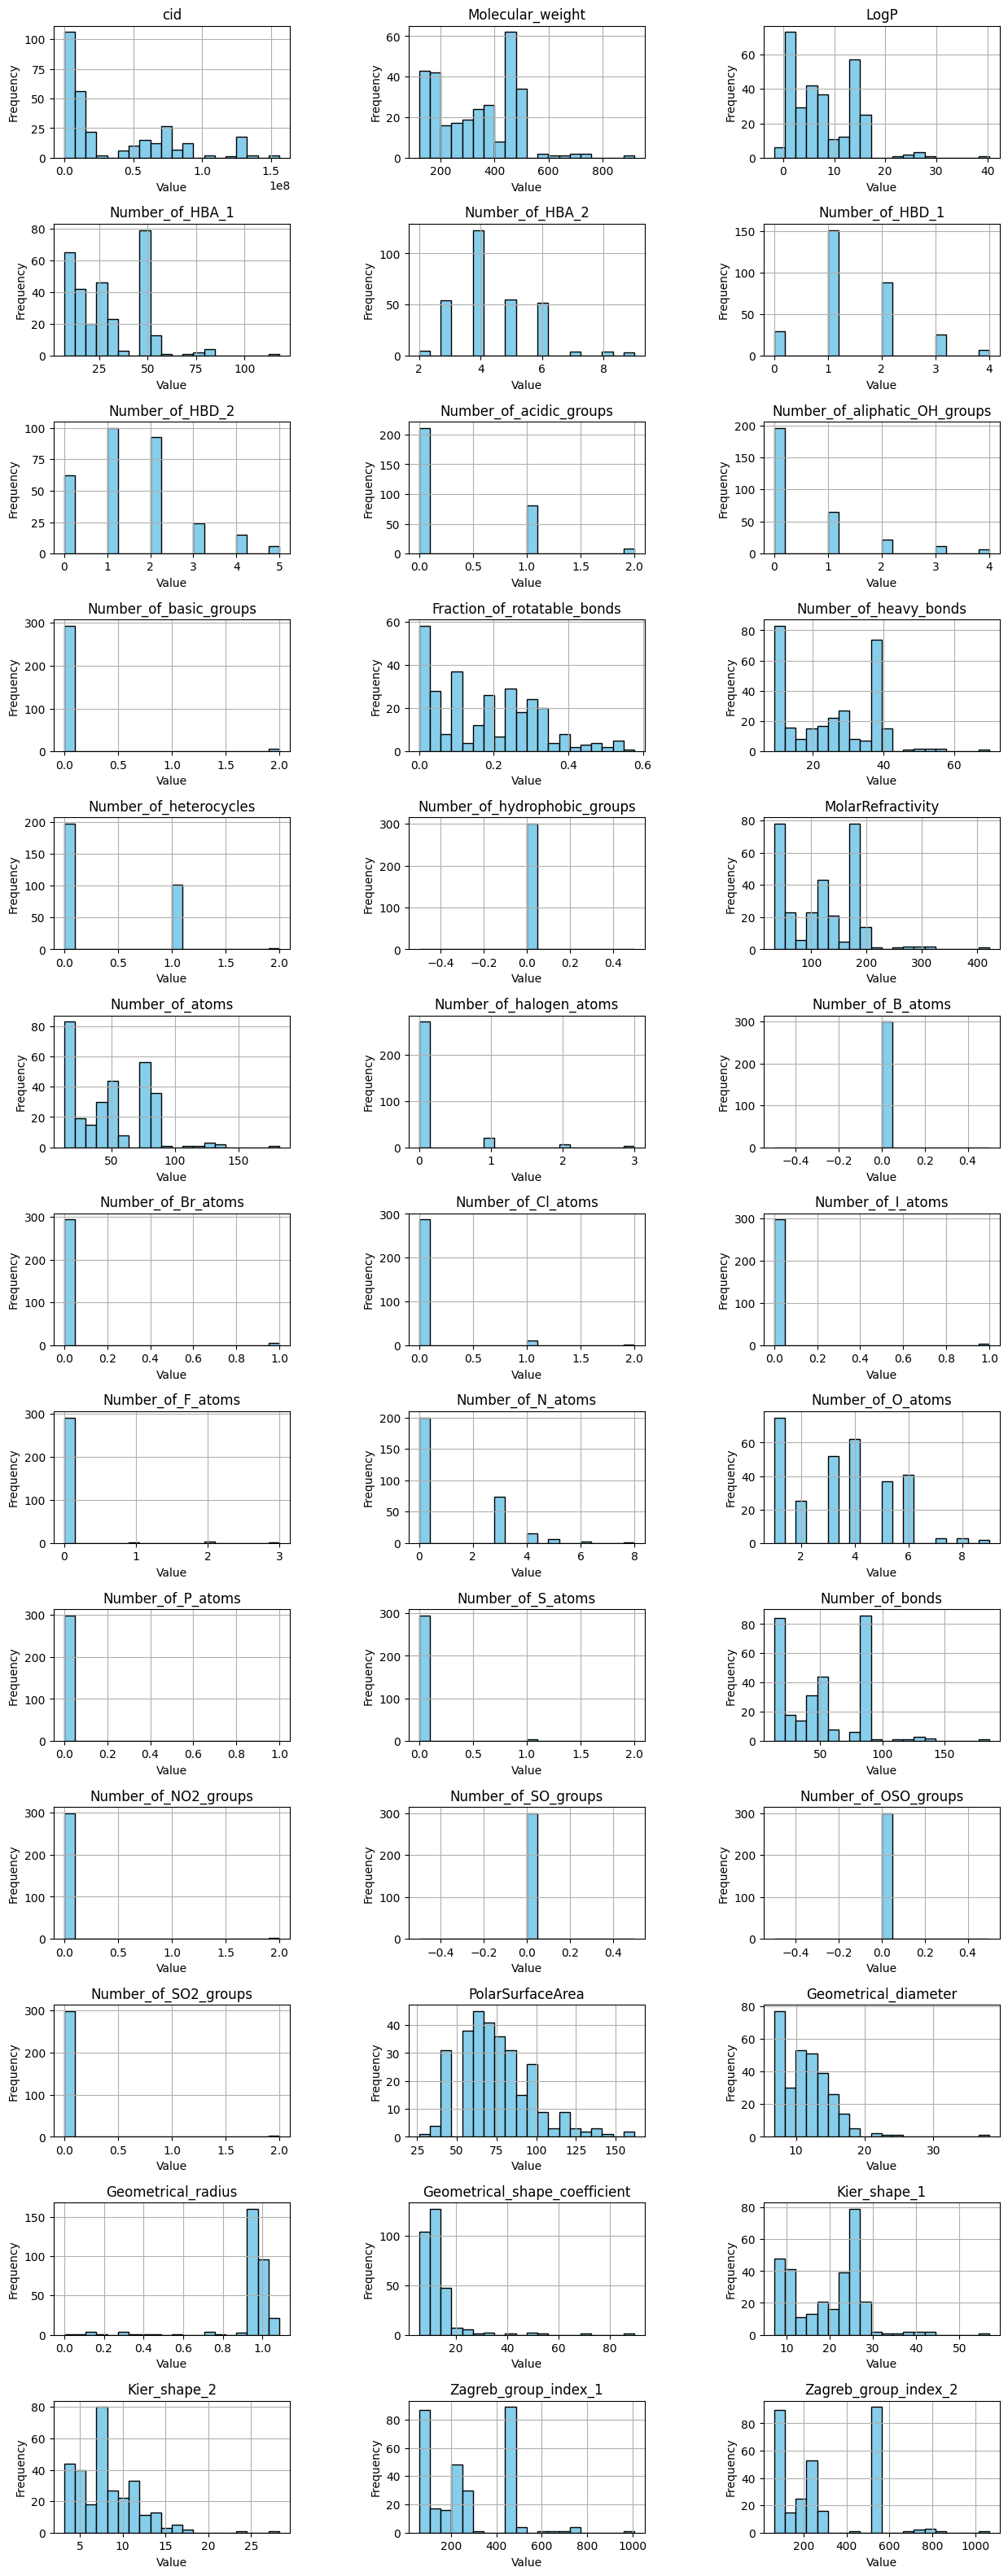

In [9]:
##Aanlisis exploratorio de la data (creo histogramas para cada una de las caracteristicas)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(13, 3, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Itero sobre cada columna de mi dataset
for i, column in enumerate(df.columns):
    row = i // 3  #indice fila
    col = i % 3   #indice columna
    ax = axs[row, col]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.show()

In [10]:
print(df.columns)

Index(['cid', 'Molecular_weight', 'LogP', 'Number_of_HBA_1', 'Number_of_HBA_2',
       'Number_of_HBD_1', 'Number_of_HBD_2', 'Number_of_acidic_groups',
       'Number_of_aliphatic_OH_groups', 'Number_of_basic_groups',
       'Fraction_of_rotatable_bonds', 'Number_of_heavy_bonds',
       'Number_of_heterocycles', 'Number_of_hydrophobic_groups',
       'MolarRefractivity', 'Number_of_atoms', 'Number_of_halogen_atoms',
       'Number_of_B_atoms', 'Number_of_Br_atoms', 'Number_of_Cl_atoms',
       'Number_of_I_atoms', 'Number_of_F_atoms', 'Number_of_N_atoms',
       'Number_of_O_atoms', 'Number_of_P_atoms', 'Number_of_S_atoms',
       'Number_of_bonds', 'Number_of_NO2_groups', 'Number_of_SO_groups',
       'Number_of_OSO_groups', 'Number_of_SO2_groups', 'PolarSurfaceArea',
       'Geometrical_diameter', 'Geometrical_radius',
       'Geometrical_shape_coefficient', 'Kier_shape_1', 'Kier_shape_2',
       'Zagreb_group_index_1', 'Zagreb_group_index_2'],
      dtype='object')


In [11]:
df_nuevo = df[['Molecular_weight', 'LogP','Fraction_of_rotatable_bonds', 'Geometrical_diameter', 'PolarSurfaceArea']]
df_nuevo

,Molecular_weight,LogP,Fraction_of_rotatable_bonds,Geometrical_diameter,PolarSurfaceArea
0,123.114998,1.0732,0.111111,7.031056,68.87
1,165.155998,1.5166,0.166667,9.169663,107.25
2,265.053997,-1.7651,0.100000,7.029373,59.86
3,138.149998,1.2309,0.100000,7.067147,59.86
4,157.559997,1.6036,0.100000,7.646398,68.87
...,...,...,...,...,...
295,396.438991,8.6718,0.333333,16.429361,71.06
296,356.373991,5.9132,0.222222,11.376300,93.06
297,410.465990,8.5972,0.354839,16.457952,82.06
298,425.412990,6.8134,0.343750,15.917241,122.19


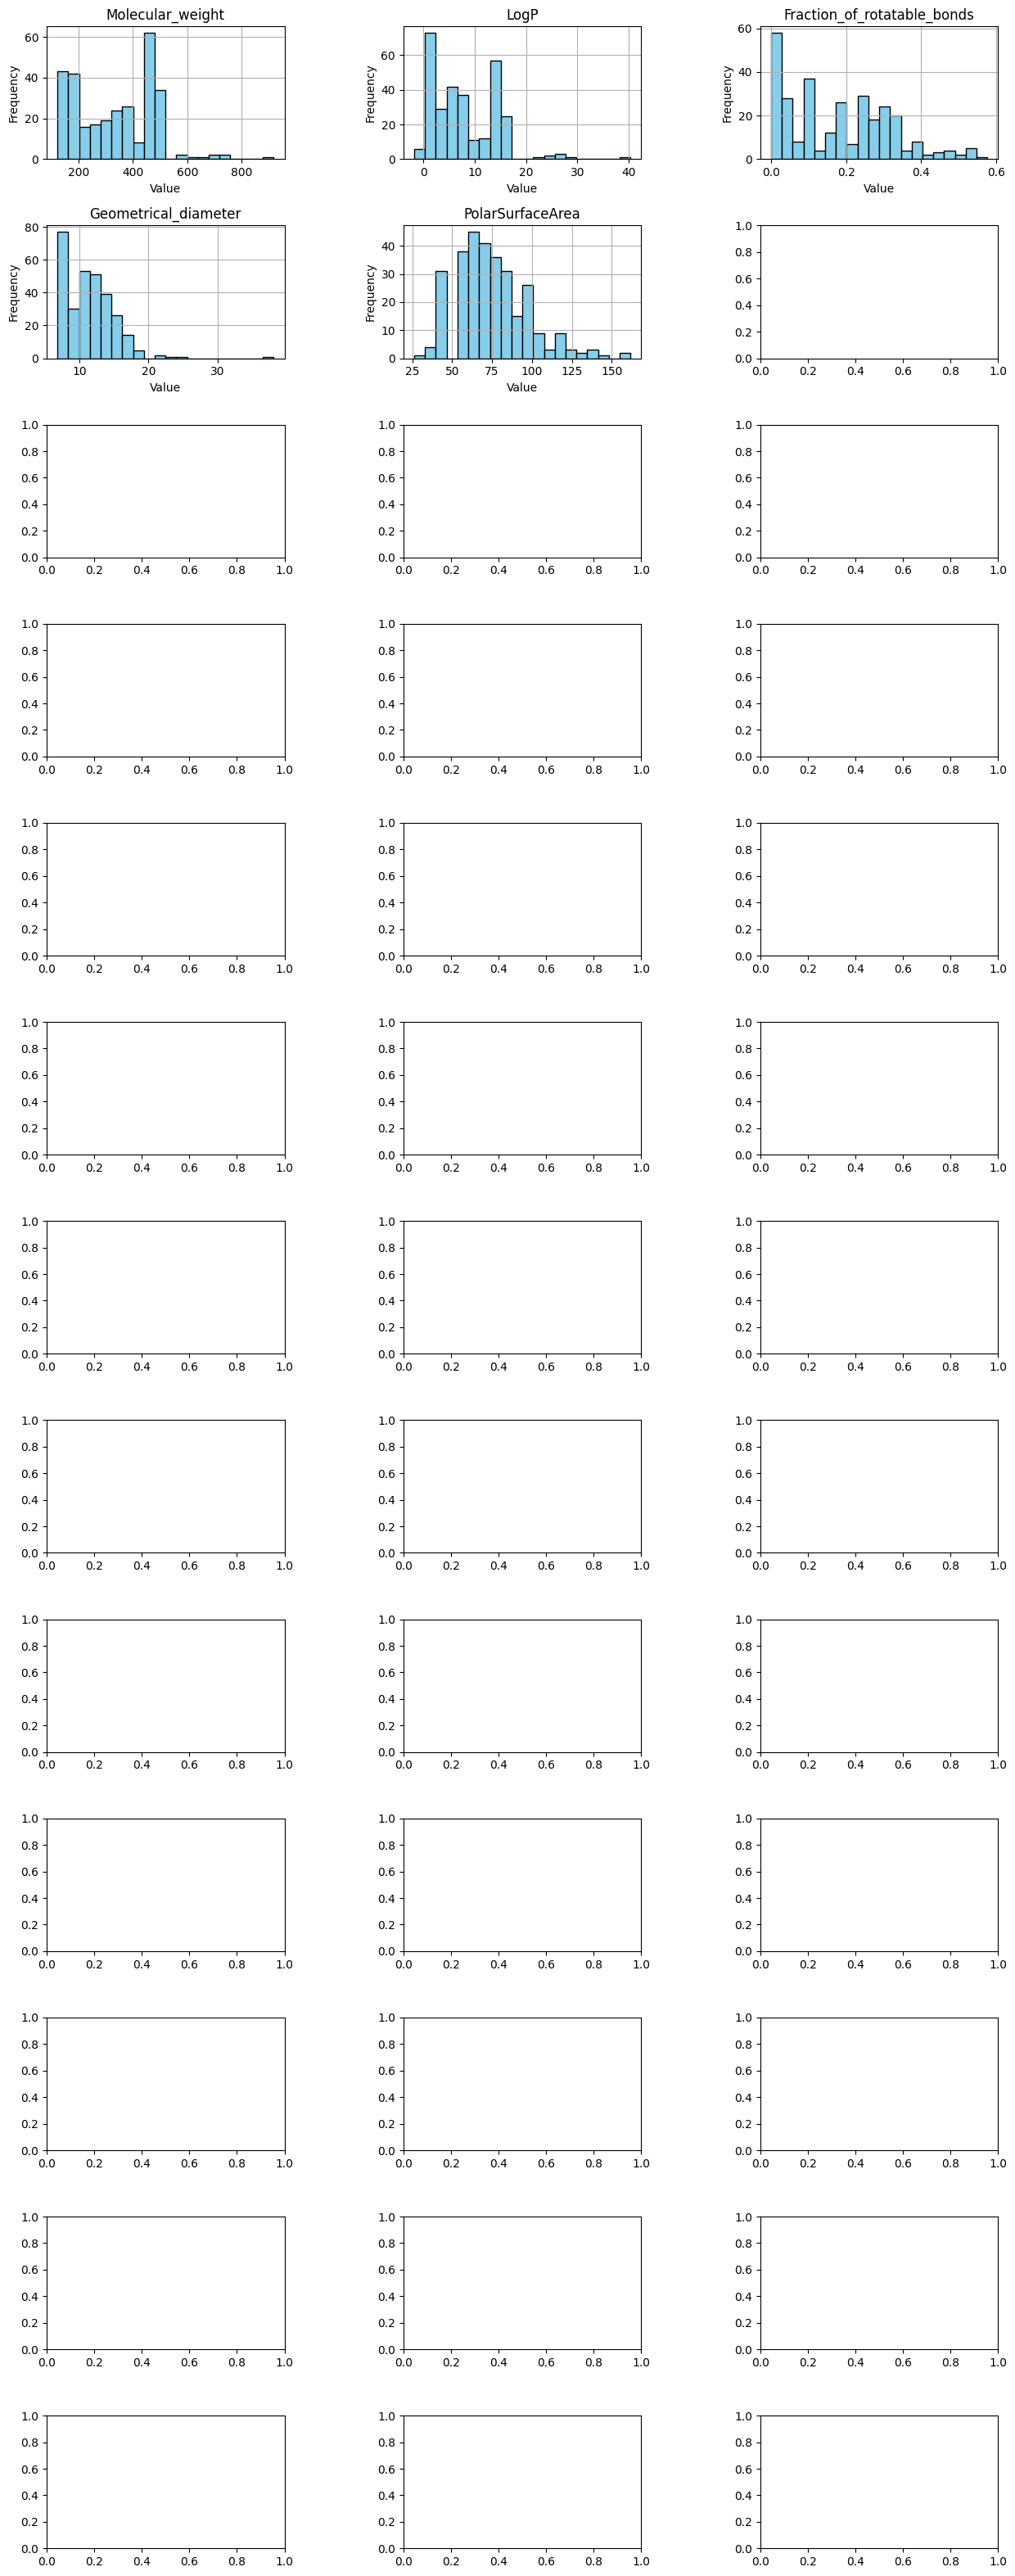

In [14]:
##Aanlisis exploratorio de la data (creo histogramas para cada una de las caracteristicas)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(13, 3, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Itero sobre cada columna de mi dataset
for i, column in enumerate(df_nuevo.columns):
    row = i // 3  #indice fila
    col = i % 3   #indice columna
    ax = axs[row, col]
    ax.hist(df_nuevo[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_escalado = scaler.fit_transform(df_nuevo)
df_escalado =  pd.DataFrame(data=X,columns=df_nuevo.columns)
df_escalado

,Molecular_weight,LogP,Fraction_of_rotatable_bonds,Geometrical_diameter,PolarSurfaceArea
0,-1.483308,-1.120595,-0.537862,-1.224219,-0.287383
1,-1.188731,-1.048108,-0.125368,-0.634971,1.410871
2,-0.488755,-1.584600,-0.620361,-1.224683,-0.686061
3,-1.377959,-1.094814,-0.620361,-1.214275,-0.686061
4,-1.241955,-1.033885,-0.620361,-1.054675,-0.287383
...,...,...,...,...,...
295,0.431847,0.121624,1.112113,1.365288,-0.190479
296,0.151116,-0.329352,0.287125,-0.026978,0.782986
297,0.530133,0.109429,1.271788,1.373166,0.296253
298,0.634866,-0.182187,1.189455,1.224184,2.071943


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=None)

In [25]:
df_pca = pca.fit(df_escalado)

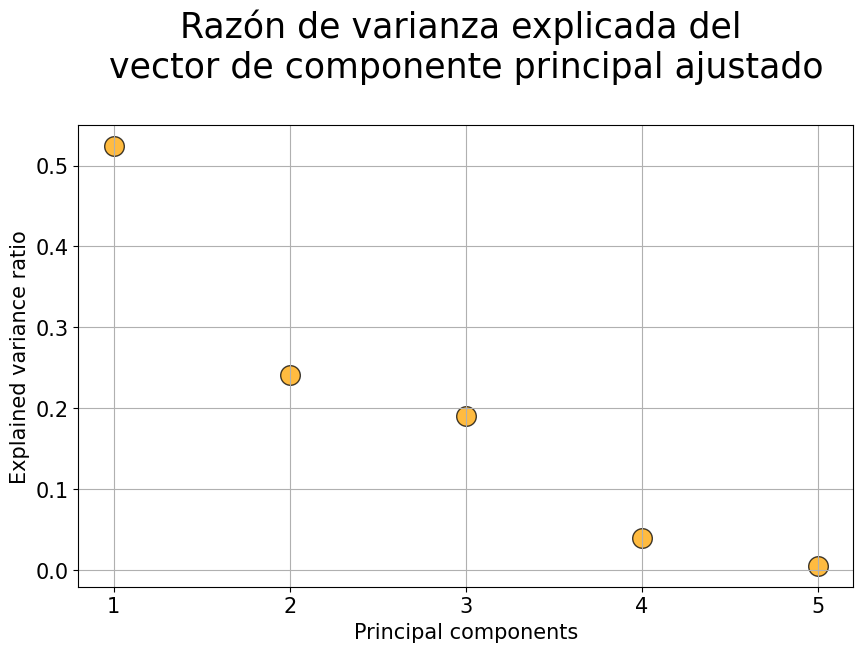

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Razón de varianza explicada del \nvector de componente principal ajustado\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [27]:
#Transformo el conjunto de datos utilizando el PCA ajustado
df_trans = pca.transform(df_escalado)
df_trans = pd.DataFrame(data=df_trans)
df_trans

,0,1,2,3,4
0,-2.153199,-0.444587,-0.634811,-0.245502,-0.171333
1,-1.637996,-0.943766,1.081996,-0.235198,-0.348304
2,-1.823770,-0.366082,-0.861238,-0.215706,0.925637
3,-2.066760,-0.291012,-0.994549,-0.282788,-0.045822
4,-1.858834,-0.483702,-0.640166,-0.295673,-0.068402
...,...,...,...,...,...
295,0.940302,1.309647,0.739435,-0.423637,0.113124
296,-0.133968,-0.234852,0.837792,0.117284,0.196955
297,0.987978,1.152300,1.217217,-0.293400,0.110510
298,0.834451,0.042830,2.630115,-0.128431,0.102383


In [31]:
print(df_escalado.columns)

Index(['Molecular_weight', 'LogP', 'Fraction_of_rotatable_bonds',
       'Geometrical_diameter', 'PolarSurfaceArea'],
      dtype='object')


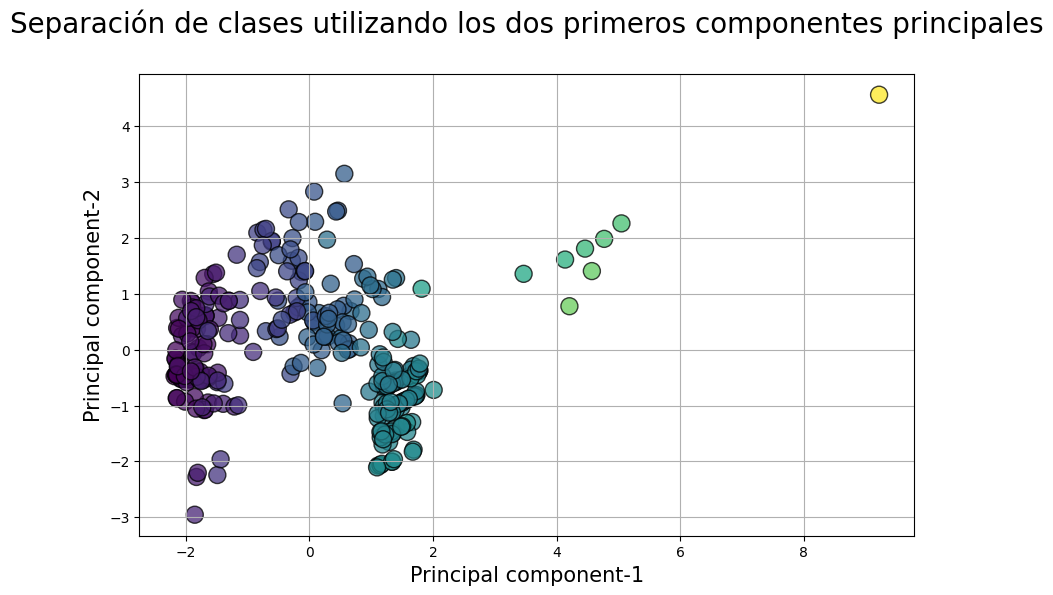

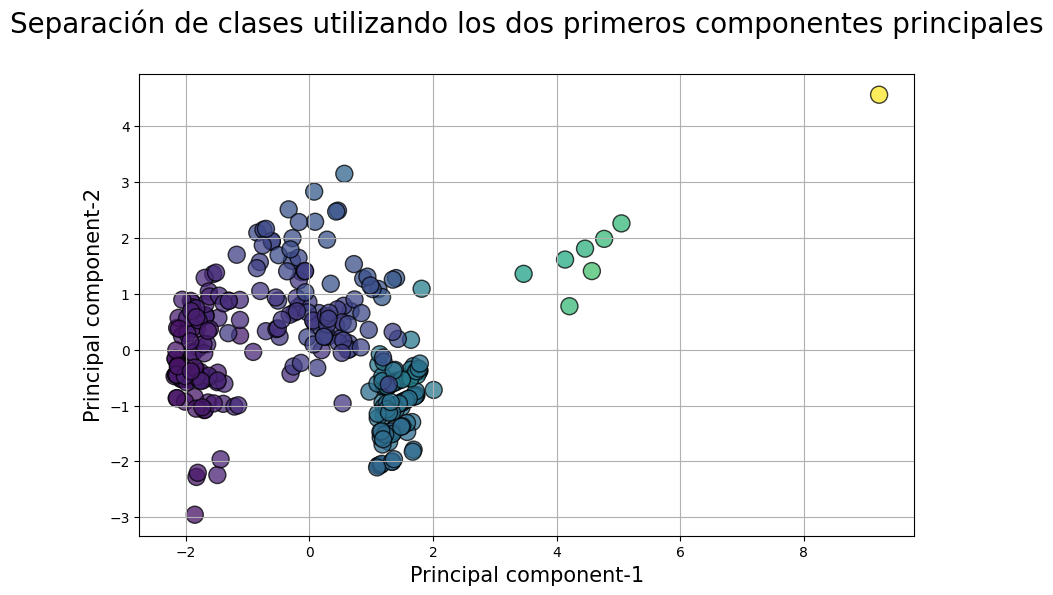

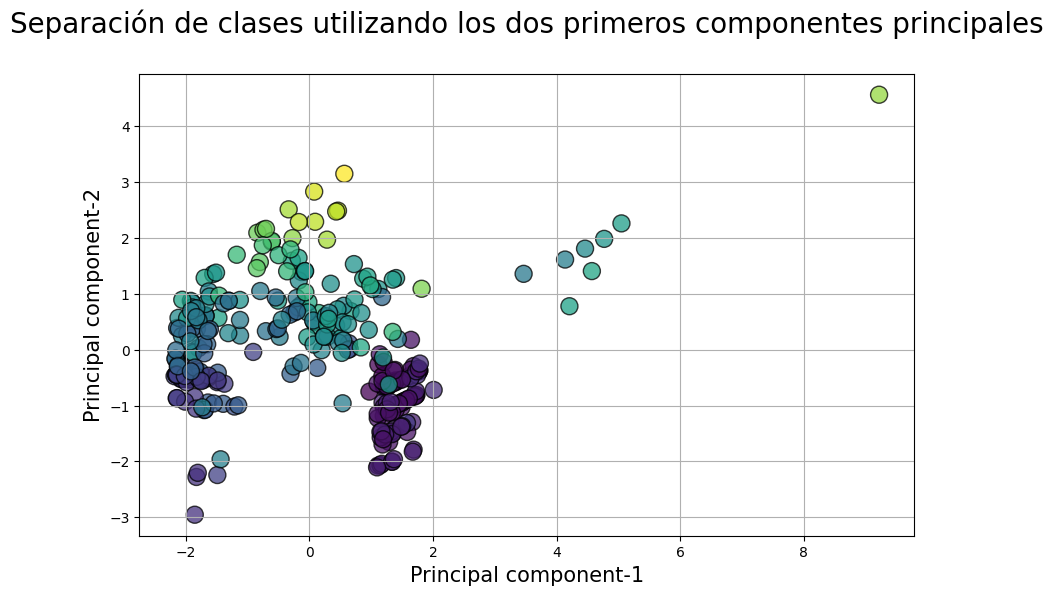

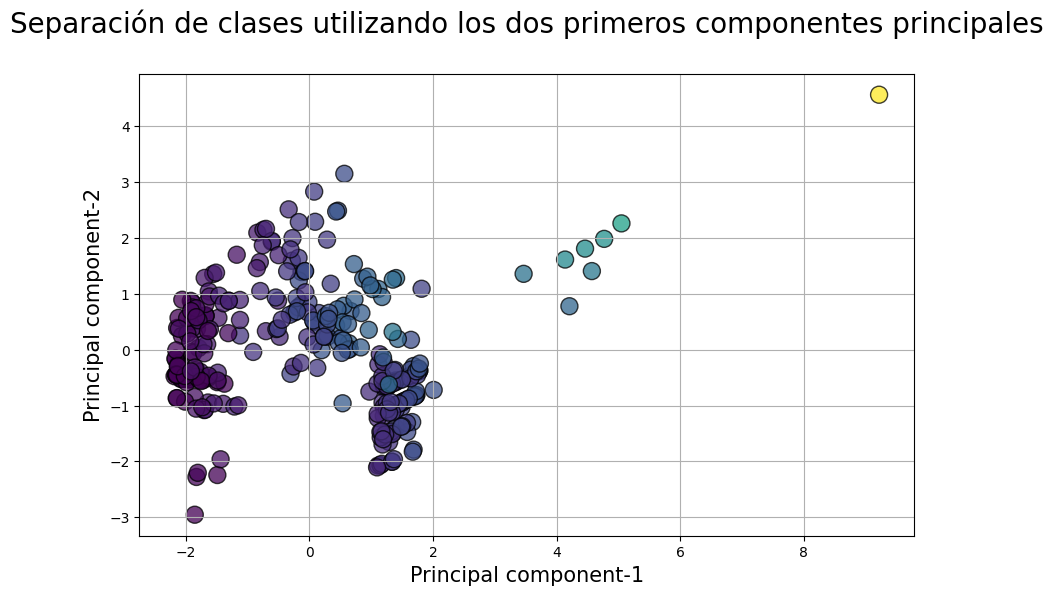

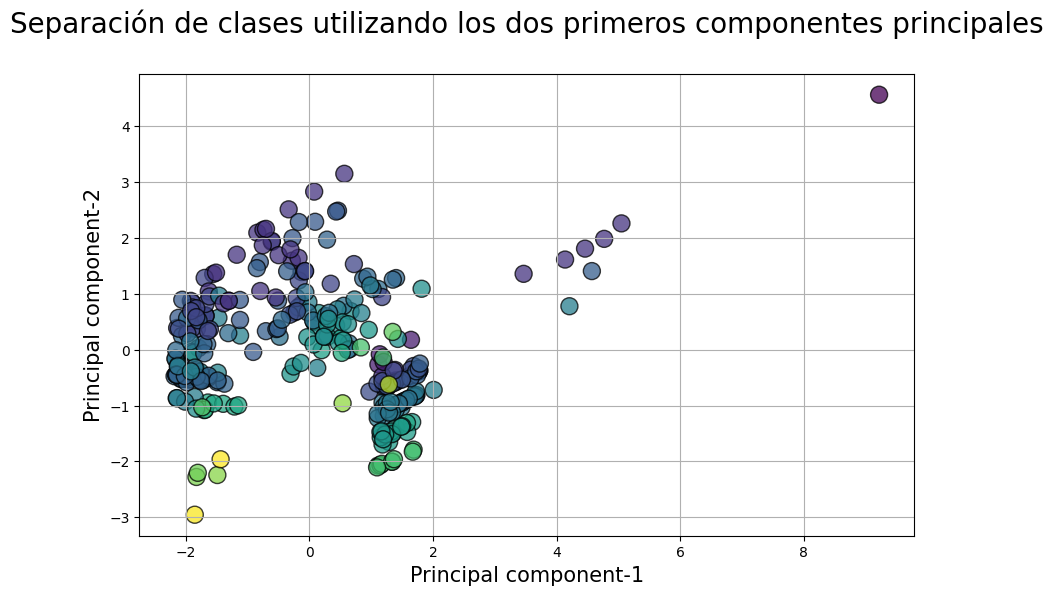

In [32]:
#Grafico mi conjunto de datos utilizando solo los dos primeros componentes (dos primeras columnas del conjunto transformado)
plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=df['Molecular_weight'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=df['LogP'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=df['Fraction_of_rotatable_bonds'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=df['Geometrical_diameter'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=df['PolarSurfaceArea'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
plt.show()